# Image Classification using ANN

## Importing the Necessary Libraries

In [86]:
import pandas as pd
import numpy as np
import time
from imutils import paths
import os
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, cohen_kappa_score, roc_curve
from tensorflow.keras.models import Sequential
from tqdm import tqdm_notebook as tqdm
import os
import warnings
import cv2
from google.colab import drive
import patoolib
import seaborn as sns

In [87]:
warnings.filterwarnings("ignore")

In [88]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
os.chdir("/content/drive/MyDrive/Colab Notebooks")

# Extracting data from RAR files

In [90]:
patoolib.extract_archive("dataset.rar")

patool: Extracting dataset.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/MyDrive/Colab Notebooks/dataset.rar"
patool:     with cwd='./Unpack_0xnzs0ym'
patool: ... dataset.rar extracted to `dataset3' (local file exists).


'dataset3'

## Fetching the data and labels from the dataset

In [91]:
data = []
labels = []
classes = ["Forest", "Buildings"]
imagepaths = list(paths.list_images("dataset"))

with tqdm(total = len(imagepaths)) as pbar:
    for i in imagepaths:
        image = cv2.imread(i)
        image = cv2.resize(image, (32,32))
        data.append(image.flatten())
        label = 1 if i.split(sep= "/")[1] == "Buildings" else 0
        labels.append(label)
        pbar.update(1)
data = np.array(data, "float")/255
data

  0%|          | 0/883 [00:00<?, ?it/s]

array([[0.62745098, 0.8       , 0.75294118, ..., 0.16862745, 0.22745098,
        0.22352941],
       [0.42352941, 0.67058824, 0.63137255, ..., 0.0745098 , 0.22745098,
        0.18823529],
       [0.4627451 , 0.37647059, 0.33333333, ..., 0.18039216, 0.67058824,
        0.58823529],
       ...,
       [0.87058824, 0.61960784, 0.40392157, ..., 0.37254902, 0.34509804,
        0.33333333],
       [0.5372549 , 0.31372549, 0.21176471, ..., 0.92156863, 0.87058824,
        0.83137255],
       [0.91764706, 0.91372549, 0.8745098 , ..., 0.23529412, 0.19607843,
        0.19215686]])

In [92]:
labels = np.array(labels)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [93]:
test = pd.Series(labels)
test.value_counts()

1    488
0    395
dtype: int64

# Pictorial representation of the pixel values

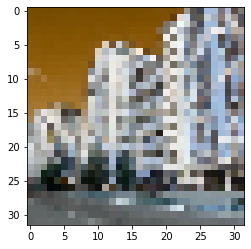

In [94]:
test_image = data[405]*255
test_image = test_image.astype("int")
test_image = test_image.reshape(32,32,3)
plt.imshow(test_image)

## Splitting the Data

In [95]:
SEED = 10
x_train, x_test, y_train, y_test = train_test_split(data, labels,test_size = 0.3, random_state = SEED)

## Building the Model

In [96]:
model = Sequential()
model.add(Dense(input_shape= (3072,),units= 1024, activation = "relu", kernel_initializer= "uniform"))
model.add(Dense(units= 512, activation= "relu", kernel_initializer= "uniform"))
model.add(Dense(units = 1, activation = "sigmoid", kernel_initializer="uniform"))

In [97]:
opt = SGD()
model.compile(optimizer=opt, loss= "binary_crossentropy", metrics = ["accuracy"])

In [98]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_10 (Dense)            (None, 512)               524800    
                                                                 
 dense_11 (Dense)            (None, 1)                 513       
                                                                 
Total params: 3,672,065
Trainable params: 3,672,065
Non-trainable params: 0
_________________________________________________________________


In [99]:
H = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 50, batch_size= 32)

Epoch 1/50
20/20 [==============================] - 1s 36ms/step - loss: 0.6353 - accuracy: 0.5793 - val_loss: 0.6481 - val_accuracy: 0.5208
Epoch 2/50
20/20 [==============================] - 1s 30ms/step - loss: 0.5935 - accuracy: 0.5955 - val_loss: 0.6032 - val_accuracy: 0.6491
Epoch 3/50
20/20 [==============================] - 1s 28ms/step - loss: 0.5595 - accuracy: 0.6942 - val_loss: 0.5979 - val_accuracy: 0.6000
Epoch 4/50
20/20 [==============================] - 1s 31ms/step - loss: 0.5282 - accuracy: 0.7346 - val_loss: 0.5743 - val_accuracy: 0.6604
Epoch 5/50
20/20 [==============================] - 1s 27ms/step - loss: 0.5028 - accuracy: 0.7702 - val_loss: 0.5162 - val_accuracy: 0.7774
Epoch 6/50
20/20 [==============================] - 1s 29ms/step - loss: 0.4790 - accuracy: 0.8091 - val_loss: 0.5013 - val_accuracy: 0.8189
Epoch 7/50
20/20 [==============================] - 1s 28ms/step - loss: 0.4501 - accuracy: 0.8366 - val_loss: 0.4787 - val_accuracy: 0.7774
Epoch 8/50
20

In [100]:
y_pred_prob = model.predict(x_test, batch_size = 32)
y_pred_prob

array([[9.49322283e-01],
       [9.61837590e-01],
       [8.58857751e-01],
       [9.32820499e-01],
       [8.30145359e-01],
       [9.10287857e-01],
       [2.41029263e-03],
       [2.52901971e-01],
       [1.61880255e-03],
       [3.72225046e-03],
       [9.03891921e-01],
       [6.46026134e-02],
       [9.55975533e-01],
       [8.31300437e-01],
       [9.99198556e-01],
       [2.64168382e-02],
       [2.39074230e-04],
       [1.65114403e-02],
       [5.70272803e-02],
       [8.38855743e-01],
       [6.42468452e-01],
       [9.91722941e-01],
       [9.78987455e-01],
       [3.70752811e-03],
       [5.16483486e-02],
       [4.33676213e-01],
       [1.86010003e-02],
       [9.89244461e-01],
       [7.73256421e-01],
       [1.58053100e-01],
       [9.99774337e-01],
       [3.47917557e-01],
       [2.80046463e-03],
       [6.77812099e-03],
       [5.73438406e-03],
       [4.31782663e-01],
       [9.79493499e-01],
       [1.34483874e-02],
       [9.97214913e-01],
       [9.74488378e-01],


## Model Evaluation

In [101]:
def classification_analysis(y_test,y_pred):
    print("Classification Analysis-->")
    print("Cohen Kappa Score:", cohen_kappa_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))
    print("Classification Report:\n", classification_report(y_pred=y_pred, y_true =y_test))
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index = ["Forest:0", "Buildings:1"], columns = ["Forest:0","Buildings:1"])
    sns.heatmap(cm_df, annot =True, fmt = "d")
    plt.xlabel("Predicted Value")
    plt.ylabel("True Value")
    plt.title("Confusion Matrix")

In [102]:
 def plot_roc(y_test,y_prob):
     print("ROC AUC Score: ", roc_auc_score(y_test, y_prob))
     fpr, tpr, thresholds = roc_curve(y_test,y_prob)
     plt.plot(fpr,tpr)
     plt.xlim([0.0, 1.0])
     plt.ylim([0.0, 1.0])
     plt.plot([0,1],[0,1], 'r--')
     plt.title('ROC Curve for h1n1_vaccine Classifier', fontsize = 15)
     plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
     plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
     plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_prob),4)))
     plt.grid(True)

In [103]:
y_pred = []
for i in y_pred_prob:
    if i >=0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

Classification Analysis-->
Cohen Kappa Score: 0.6731679334576223
ROC AUC Score: 0.9304461942257218
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.76      0.82       127
           1       0.81      0.91      0.85       138

    accuracy                           0.84       265
   macro avg       0.84      0.83      0.84       265
weighted avg       0.84      0.84      0.84       265



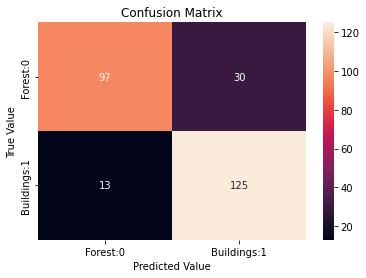

In [104]:
classification_analysis(y_test, y_pred)

ROC AUC Score:  0.9304461942257218


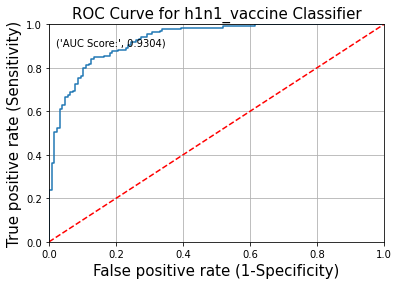

In [105]:
plot_roc(y_test, y_pred_prob)

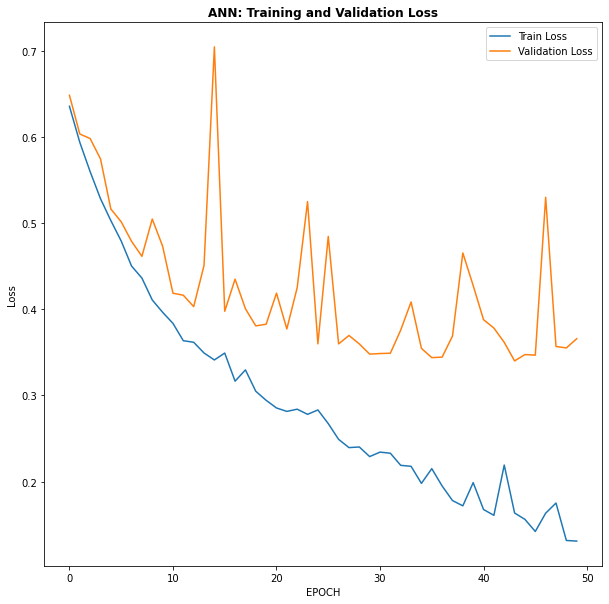

In [110]:
fig, ax = plt.subplots(figsize=(10,10))
N = np.arange(0,50)
plt.plot(N, H.history["loss"], label = "Train Loss")
plt.plot(N, H.history["val_loss"], label = "Validation Loss")
plt.xlabel("EPOCH")
plt.ylabel("Loss")
plt.title("ANN: Training and Validation Loss", weight = "bold")
plt.legend()
plt.show()

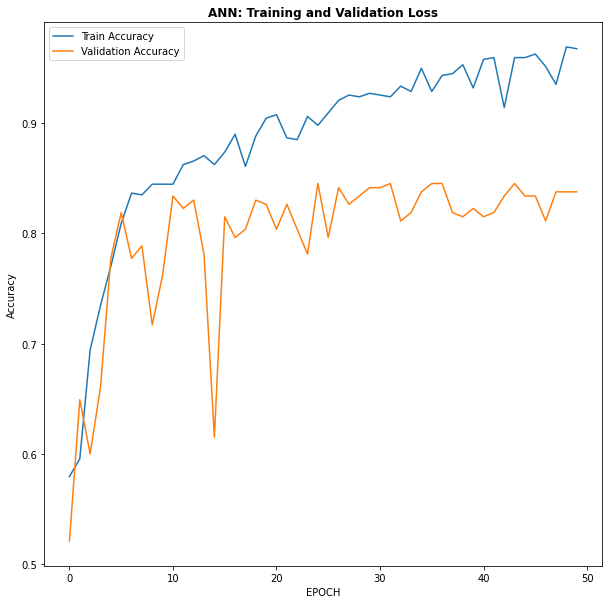

In [111]:
fig, ax = plt.subplots(figsize=(10,10))
N = np.arange(0,50)
plt.plot(N, H.history["accuracy"], label = "Train Accuracy")
plt.plot(N, H.history["val_accuracy"], label = "Validation Accuracy")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.title("ANN: Training and Validation Loss", weight = "bold")
plt.legend()
plt.show()

In [108]:
!pip install gradio

## Model Deployment

In [120]:
import gradio as gr
def predict_image(image):
    
    image = cv2.resize(image, (32, 32))

    # scale the pixel values to [0, 1]
    image = image.astype("float") / 255.0

    # for a simple fully-connected network, flatten the image
    image = image.flatten()
    image = image.reshape((1, image.shape[0]))

    # make a prediction on the image
    preds = model.predict(image)
    result = "Building" if preds>=0.5 else "Forest"
    print(result)
    
    return result

im = gr.inputs.Image(shape=(32,32))
label = gr.outputs.Label(num_top_classes=1)

gr.Interface(fn=predict_image, inputs=im, outputs=label, capture_session=True, title="ANN Demo").launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://11075.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7f6ce69e6550>,
 'http://127.0.0.1:7863/',
 'https://11075.gradio.app')